<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия¶" data-toc-modified-id="Логистическая-регрессия¶-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия¶</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('/datasets/Churn.csv') 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [17]:
data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
row_number          10000 non-null int64
customer_id         10000 non-null int64
surname             10000 non-null object
credit_score        10000 non-null int64
geography           10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              9091 non-null float64
balance             10000 non-null float64
num_of_products     10000 non-null int64
has_cr_card         10000 non-null int64
is_active_member    10000 non-null int64
estimated_salary    10000 non-null float64
exited              10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [19]:
#удалм колонку с фамилиями и строки, где tenure равно 0
data = data.drop(['surname', 'row_number', 'customer_id'], axis=1)
data = data.dropna(subset=['tenure'])

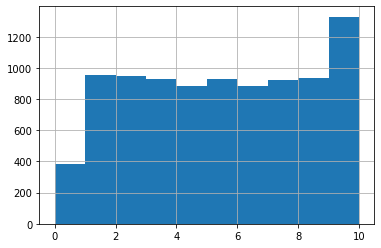

In [20]:
data.tenure.hist()

In [21]:
#проверим полные дубликаты
data.duplicated().sum()

0

In [22]:
data = pd.get_dummies(data, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
credit_score         9091 non-null int64
age                  9091 non-null int64
tenure               9091 non-null float64
balance              9091 non-null float64
num_of_products      9091 non-null int64
has_cr_card          9091 non-null int64
is_active_member     9091 non-null int64
estimated_salary     9091 non-null float64
exited               9091 non-null int64
geography_Germany    9091 non-null uint8
geography_Spain      9091 non-null uint8
gender_Male          9091 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


### Вывод
Исследовали данные. Дубликатов не обнаружено. Привели названия признаков к удобному формату.

Обнаружены пропуски в столбце tenure, удалили эти строки. 

Категориальные признаки sex и geography перевели в количественные с помощью one-hot encoding, при этом убрали исходный столбец (чтобы избежать дамми-ловушки). Категориальный признак surname предварительно удалили из датасета.



## Исследование задачи

In [23]:
# разделяем выборку на обучающую, валидационную и тестовую

features = data.drop(['exited'], axis=1)
target = data['exited']

X, X_test, y, y_test = train_test_split(features, target, test_size=.2, random_state=25)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=25)

for i in [X_train, y_train, X_valid, y_valid, X_test, y_test]:
    print(i.shape)

(5454, 11)
(5454,)
(1818, 11)
(1818,)
(1819, 11)
(1819,)


Посмотрим на баланс классов

In [24]:
target.value_counts(normalize=True)

0    0.796062
1    0.203938
Name: exited, dtype: float64

<b>Вывод: </b>  20% клиентов уходят, классы несбалансированы. Тем не менее попробуем обучить модели без балансировки.

In [25]:
# функция для автоматизации проверки, возвращает F1 и ROC-AUC на валидационной выборке
def check(Model, features_train, target_train):
    model = Model 
    model.fit(features_train, target_train) 
    predictions = model.predict(X_valid) 
    return f1_score(y_valid, predictions), roc_auc_score(y_valid, predictions)

### Логистическая регрессия

In [26]:
model = LogisticRegression(random_state=25, solver='liblinear')
result = check(model, X_train, y_train)
print(f"F1:{result[0]}, ROC-AUC:{result[1]}")

F1:0.1, ROC-AUC:0.517324224968883


In [27]:
check(model, X_train, y_train)

(0.1, 0.517324224968883)

<b>Вывод: </b>  f1-метрика для логистической регрессии дает 0, что связано с тем что precision или recall равны 0. Это как раз можно ожидать, если предсказания равны 0. Значение ROC-AUC = 0.5 говорит о том, что модель выдает случайные значения.

In [28]:
#код ревьюера
model.fit(X_train, y_train) 
predictions = model.predict_proba(X_valid)[:, 1]
predictions.max()

0.6943891522503242

### Случайный лес 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy наилучшей модели на валидационной выборке: 0.565
Количество деревьев: 61, глубина: 13


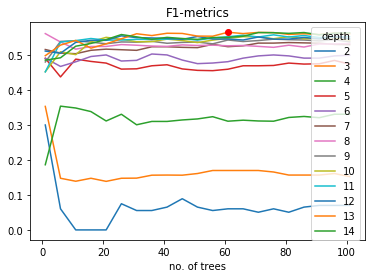

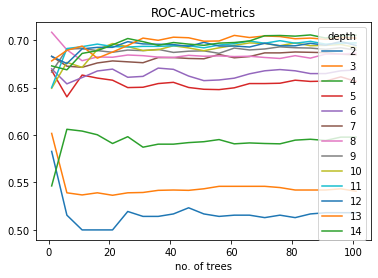

In [29]:
#случайный лес
best_model = None
best_result = 0
best_est, best_depth = 0,0
estimators = list(range(1, 102, 5))
new = pd.DataFrame(index=estimators)
new_rocauc = pd.DataFrame(index=estimators)


for depth in range(2, 15):
    results = []
    results_rocauc = []
    for est in estimators: 
        result = check(RandomForestClassifier(random_state=101, n_estimators=est, max_depth=depth),
                       X_train,
                       y_train)
        results.append(result[0])
        results_rocauc.append(result[1])      
        
        if result[0] > best_result:
            best_result = result[0]
            best_est, best_depth = est, depth
            
    new[str(depth)] = results
    new_rocauc[str(depth)] = results_rocauc

print("Accuracy наилучшей модели на валидационной выборке:", round(best_result,3))
print(f'Количество деревьев: {best_est}, глубина: {best_depth}')

plt.plot(new)    
plt.legend(title='depth', labels=new.columns)
plt.plot(best_est, best_result, 'ro')
plt.title('F1-metrics')
plt.xlabel('no. of trees')
plt.show()

plt.plot(new_rocauc)    
plt.legend(title='depth', labels=new_rocauc.columns)
plt.title('ROC-AUC-metrics')
plt.xlabel('no. of trees')
plt.show()

<b>Вывод: </b>  Модель случайного леса на исходных данных дает наилучшее значение для F1-метрики 0.554 для 86 деревьев глубиной 14. ROC-AUC при этом составляет примерно 0.7.

### Вывод
Значение F1 для логистической регрессии равно 0. Модель не работает, так как классы не сбалансированы. 

Модель случайного леса на исходных данных дает наилучшее значение для  F1-метрики 0.554 для 86 деревьев глубиной 14. ROC-AUC при этом составляет примерно 0.7.

## Борьба с дисбалансом

### Логистическая регрессия¶

Попробуем применить разные способы борьбы с дисбалансом.

Встроенный способ метода LogisticRegression:

In [30]:
model = LogisticRegression(random_state=25, solver='liblinear', class_weight='balanced')
result = check(model, X_train, y_train)
print(f"F1:{result[0]:.3f}, ROC-AUC:{result[1]:.3f}")

F1:0.502, ROC-AUC:0.705


Увеличение размера класса "1":

In [31]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=25)
    
    return features_upsampled, target_upsampled 

In [32]:
for n in range(1,10):
    features_upsampled, target_upsampled = upsample(X_train, y_train, n)

    model = LogisticRegression(random_state=25, solver='liblinear')
    result = check(model, features_upsampled, target_upsampled)    
    print(f"1:{n} F1:{result[0]:.3f} ROC-AUC:{result[1]:.3f}")   

1:1 F1:0.100 ROC-AUC:0.517
1:2 F1:0.343 ROC-AUC:0.592
1:3 F1:0.448 ROC-AUC:0.651
1:4 F1:0.446 ROC-AUC:0.655
1:5 F1:0.436 ROC-AUC:0.647
1:6 F1:0.418 ROC-AUC:0.627
1:7 F1:0.402 ROC-AUC:0.603
1:8 F1:0.391 ROC-AUC:0.586
1:9 F1:0.384 ROC-AUC:0.573


<b>Вывод: </b>  Путем приведения отношения размеров классов к 1:1 удается увеличить значение метрики f1 до 0.49. Как и ожидалось, это достигается, если увеличить размер класса "1" в 4 раза, или уменьшить размер класса "0" в 4 раза. При дальнейшем изменении соотношения размеров классов модель становится опять случайной.

Для модели случайного леса возьмем, например upsampled-классы.

### Случайный лес

Accuracy наилучшей модели на валидационной выборке: 0.634
Количество деревьев: 66, глубина: 14


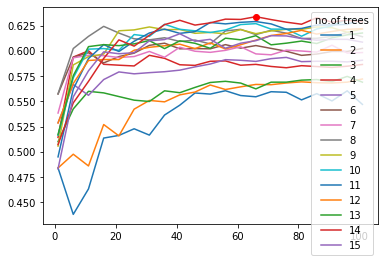

In [38]:
#случайный лес
best_result = 0
best_est, best_depth = 0,0
estimators = list(range(1, 102, 5))
new = pd.DataFrame(index=estimators)

features_upsampled, target_upsampled = upsample(X_train, y_train, 4)


for depth in range(1, 16):
    results = []
    for est in estimators:
        result = check(RandomForestClassifier(random_state=25, n_estimators=est, max_depth=depth),
                    features_upsampled,
                    target_upsampled)
        results.append(result[0])      
        
        if result[0] > best_result:
            best_result = result[0]
            best_est, best_depth = est, depth
            
    new[str(depth)] = results
    
plt.plot(new)    
plt.legend(title='no.of trees', labels=new.columns)
plt.plot(best_est, best_result, 'ro')
print("Accuracy наилучшей модели на валидационной выборке:", round(best_result,3))
print(f'Количество деревьев: {best_est}, глубина: {best_depth}')

### Вывод
При учете несбалансированности классов (исходные размеры классов соотносятся как 4:1), можно добиться улучшения качества обучения модели. Для Логистической регрессии значение F1 метрики достигает 0.49. Для случайного леса протестировали модели с количеством деревьев до 100 и глубиной до 15. Наилучшего значения метрики  F1 = 0.642 можно добиться для модели с 21 деревом и глубиной 12. 

## Тестирование модели

In [39]:
model = RandomForestClassifier(random_state=25, n_estimators=21, max_depth=12)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(X_test)
print("F1:", round(f1_score(y_test, predictions), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, predictions), 3))

F1: 0.59
ROC-AUC: 0.738


### Вывод
На тестовых данных протестировали модель, показавшую лучшее качество на валидационной выборке. Метрика F1 = 0.607, а ROC-AUC - 0.751.  

## Общий вывод
Был проанализирован предложенный датасет с информацией от "Бета-Банка". Выборка разделена на обучающую, валидационную и тестовую в соотношении 3:1:1.

Проверили качество моделей бинарной классификации (случайный лес, логистическая регрессия) с использованием метрик F1 и AUC-ROC сначала на исходных классах (соотношение "0":"1" = 4:1), затем на сбалансированных. Для модели случайного леса варьировали параметры количества деревьев от 1 до 100, а глубину от 1 до 15. 

На несбалансированных классах логистическая регрессия не работает (предсказания случайны), наилучшее значение метрики F1 для модели случайного леса равно 0.554. 

При учете размера классов наилучшее значение F1-метрики для модели логистической регрессии равно 0.496, для модели случайного леса равно 0.642 (21 дерево с глубиной 12). 

На тестовых данных протестировали модель, показавшую лучшее качество на валидационной выборке. Метрика F1 = 0.607, а ROC-AUC - 0.751.


